In [49]:
import pandas as pd
import numpy as np

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns


In [51]:
%matplotlib inline

In [52]:
df = pd.read_csv("house_price.csv")
df.head() #df.head returns first n rows.It is used to check if our data is in correct order or not.


,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,114300,1290,3,3,2,Yes,North
1,114300,1790,2,2,2,No,East
2,112321,1222,2,3,1,No,West
3,114200,2030,4,2,3,No,East
4,114800,1740,3,2,1,No,East


In [53]:
df.info() #it gives us info about type of data we stored and their count

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Price         130 non-null    int64 
 1   SqFt          130 non-null    int64 
 2   Bedrooms      130 non-null    int64 
 3   Bathrooms     130 non-null    int64 
 4   Offers        130 non-null    int64 
 5   Brick         130 non-null    object
 6   Neighborhood  130 non-null    object
dtypes: int64(5), object(2)
memory usage: 7.2+ KB


In [54]:
df.describe() #it gives us average and standard devaition and other useful statistical tools 

,Price,SqFt,Bedrooms,Bathrooms,Offers
count,130.000000,130.000000,130.000000,130.000000,130.000000
mean,130164.007692,1989.476923,3.015385,2.453846,2.561538
std,26743.706096,229.255425,0.725874,0.515068,1.071143
min,69100.000000,1222.000000,2.000000,2.000000,1.000000
25%,111450.000000,1872.500000,3.000000,2.000000,2.000000
50%,125700.000000,2000.000000,3.000000,2.000000,3.000000
75%,147850.000000,2140.000000,3.000000,3.000000,3.000000
max,211200.000000,2590.000000,5.000000,4.000000,6.000000


In [55]:
df.columns
#Returns all columns names 

Index(['Price', 'SqFt', 'Bedrooms', 'Bathrooms', 'Offers', 'Brick',
       'Neighborhood'],
      dtype='object')

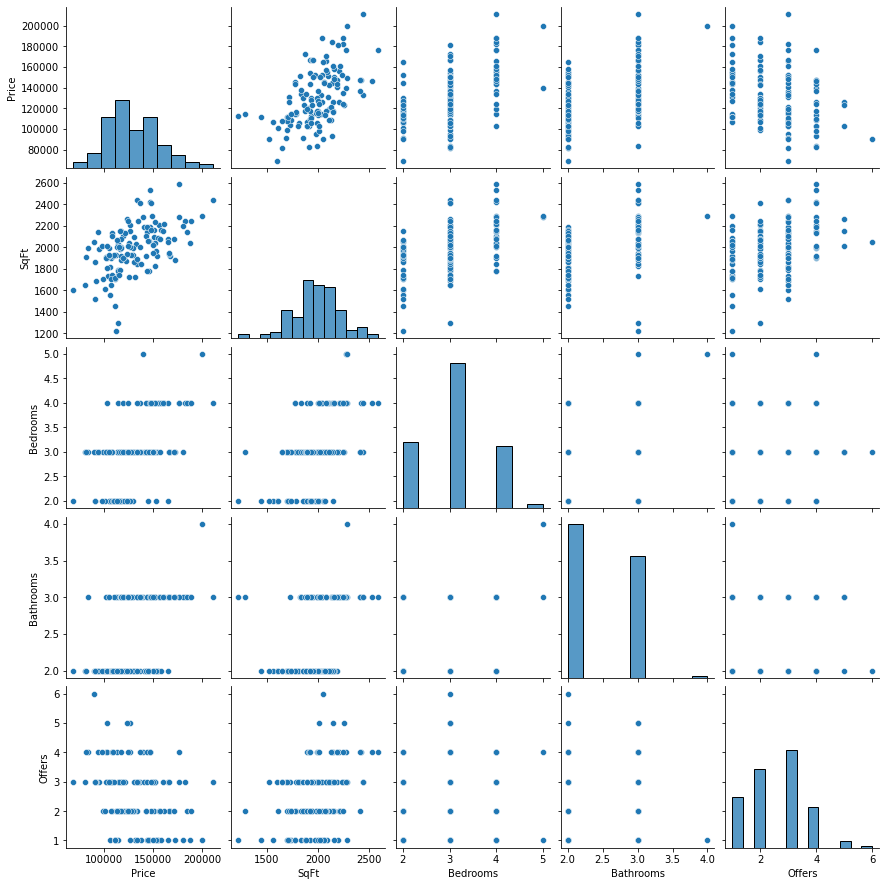

In [56]:
sns.pairplot(df)
#Gives us diff plots between our columns 

C:\Users\Lakshmi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

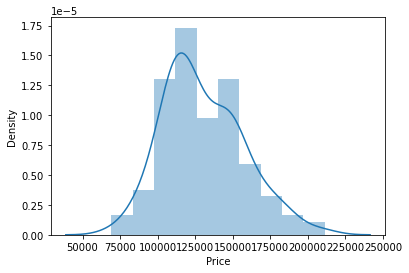

In [57]:
sns.distplot(df["Price"])
#It gives a histogram type plot for specified column it is replaced by histplot or displot

<AxesSubplot:>

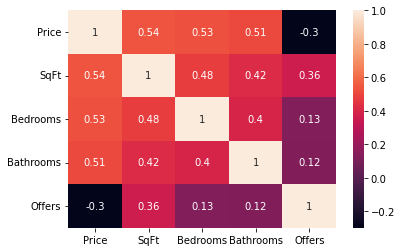

In [58]:
sns.heatmap(df.corr(), annot = True)
#df.corr gives us co relation between diff columns and heatmaps gives us the numerical sense i guess

In [59]:
df.columns

Index(['Price', 'SqFt', 'Bedrooms', 'Bathrooms', 'Offers', 'Brick',
       'Neighborhood'],
      dtype='object')

In [60]:
X = df[['SqFt', 'Bedrooms', 'Bathrooms', 'Offers']]

In [77]:
X = df.drop(['Price',
       'Neighborhood','Brick'], axis = 1)
#Y,y are called as predictor variables and x,X are called as Response Variables

In [78]:
y = df["Price"]

In [79]:
from sklearn.model_selection import train_test_split

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.4,random_state = 101)

In [81]:
from sklearn.linear_model import LinearRegression


In [82]:
ln = LinearRegression()

In [83]:
ln.fit(X_train,y_train)

LinearRegression()

In [84]:
print(ln.intercept_)

-26308.063286246208


In [85]:
ln.coef_
#https://medium.com/@chawlamahima76/role-of-coefficient-in-machine-learning-d65207f8ea22#:~:text=coefficient%20indicates%20the%20direction%20of,variable(X)%20also%20increases.

array([    62.37606574,   9710.64003989,  14857.80163501, -13650.17254587])

In [86]:
X_train.columns

Index(['SqFt', 'Bedrooms', 'Bathrooms', 'Offers'], dtype='object')

In [87]:
cdf = pd.DataFrame(ln.coef_,X.columns, columns = ["Coeff"])

In [88]:
cdf 
#How to read this table for 1 unit increase in SqFt will lead to 62.376066 units increase in Price

,Coeff
SqFt,62.376066
Bedrooms,9710.640040
Bathrooms,14857.801635
Offers,-13650.172546


# Predictions

In [89]:
predictions = ln.predict(X_test)

In [90]:
predictions

array([164061.22186694,  94509.45094032,  93604.02202173, 126832.55098313,
       143122.88999347, 132059.49702964, 105113.38211648, 129524.56217427,
        89664.48951575, 107181.6326502 , 113773.46940298, 124449.96249654,
       156503.53206049, 144579.51765209, 120116.30758629, 153457.29069078,
       119033.0851412 , 124646.93105799, 170704.90334637, 139858.96287157,
       115914.28185409,  97897.78470628, 112171.71790957, 134514.64743363,
       150889.6861437 , 160318.65792241, 113222.27066296, 110799.78995067,
       102815.30804825, 129400.15553021, 210867.3614568 , 106485.31007538,
        76689.92235396, 147383.98298632, 139307.76413155, 125624.92189398,
       117121.91094324,  97077.05548741, 104062.82936309, 143404.55825464,
       127922.99596221, 151014.09278775, 130647.67684505,  99623.94284375,
       121258.59729203, 159746.74199165, 106163.93486987, 122578.68052427,
       158374.81403275, 100260.00148956, 138651.33378242,  87990.17610494])

In [91]:
y_test 

16     176800
74     107300
91      97800
123    105600
104    136800
97     152500
25     106100
65     120500
102    103200
1      114300
41     108200
80     121300
32     182000
43     133600
103    123100
39     147000
50     115900
127    113500
31     188000
21     167200
33     112300
53      91100
13     123000
48     129800
126    147900
107    146900
120    150200
108    108500
57     125700
82     143400
118    199500
42     106600
86      90500
100    145500
6      119800
78     129800
122    110400
14     102600
113    114900
69     151900
3      114200
89     172500
68     126200
67     111100
66     130300
128    149900
88     102700
55     130800
79     176500
2      112321
45     154000
121    109700
Name: Price, dtype: int64

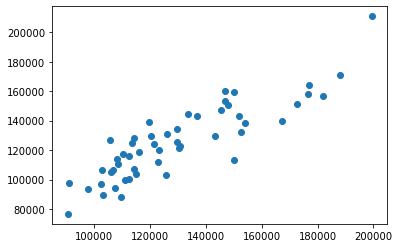

In [93]:
plt.scatter(y_test,predictions)

C:\Users\Lakshmi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

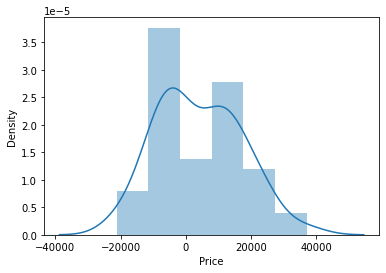

In [95]:
sns.distplot((y_test-predictions))
#If the distribution is normal then your model is the right choice for the given data

# Boston dataset

In [96]:
from sklearn.datasets import load_boston

In [97]:
boston = load_boston()

In [98]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [99]:
print(boston["DESCR"])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [100]:
print(boston["data"])

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


In [101]:
print(boston["target"]) 

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3